In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pdal
from sklearn.neighbors.kde import KernelDensity

In [2]:
def dim_kde(arr, lb, ub):
    xp = np.linspace(lb, ub, 500)[:, np.newaxis]
    kde = KernelDensity(kernel='epanechnikov', bandwidth=0.25).fit(arr[:, np.newaxis])
    log_pdf = kde.score_samples(xp)
    plt.plot(xp, np.exp(log_pdf))

In [3]:
def dim_kde_full(arr, n=500, bw=0.25, k='epanechnikov'):
    xp = np.linspace(arr.min(), arr.max(), n)[:, np.newaxis]
    kde = KernelDensity(kernel=k, bandwidth=bw).fit(arr[:, np.newaxis])
    log_pdf = kde.score_samples(xp)
    plt.plot(xp, np.exp(log_pdf))

In [4]:
def dim_kde_mad(arr):
    m1, m2 = mad(arr)
    lb = m1 - 2*m2
    ub = m1 + 2*m2
    xp = np.linspace(lb, ub, 500)[:, np.newaxis]
    kde = KernelDensity(kernel='epanechnikov', bandwidth=0.25).fit(arr[:, np.newaxis])
    log_pdf = kde.score_samples(xp)
    plt.plot(xp, np.exp(log_pdf))

In [5]:
def dim_kde_std(arr):
    m1, m2 = arr.mean(), arr.std()
    lb = m1 - 2*m2
    ub = m1 + 2*m2
    xp = np.linspace(lb, ub, 500)[:, np.newaxis]
    kde = KernelDensity(kernel='epanechnikov', bandwidth=0.25).fit(arr[:, np.newaxis])
    log_pdf = kde.score_samples(xp)
    plt.plot(xp, np.exp(log_pdf))

In [6]:
def dim_kde_twoper(arr):
    lb = np.percentile(arr,2)
    ub = np.percentile(arr,98)
    xp = np.linspace(lb, ub, 500)[:, np.newaxis]
    kde = KernelDensity(kernel='epanechnikov', bandwidth=0.25).fit(arr[:, np.newaxis])
    log_pdf = kde.score_samples(xp)
    plt.plot(xp, np.exp(log_pdf))

In [7]:
def mad(arr):
    arr = np.ma.array(arr).compressed()
    med = np.median(arr)
    return med, np.median(np.abs(arr-med))

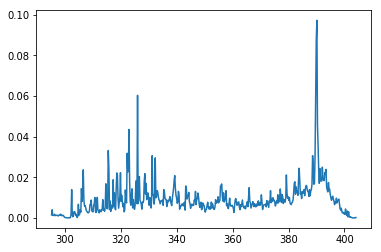

In [8]:
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz"
  ]
}'''

p = pdal.Pipeline(json)
p.validate()
count = p.execute()
data = p.arrays[0]
dim_kde_full(data['Z'], bw=0.1)

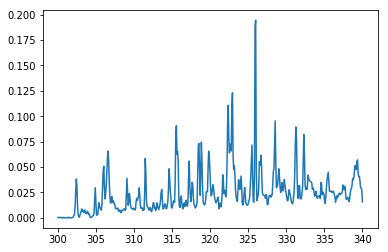

In [9]:
json = u'''
{
  "pipeline":[
    "./data/isprs/samp11-utm.laz",
    {
      "type":"filters.range",
      "limits":"Z[300:340]"
    }
  ]
}'''
p = pdal.Pipeline(json)
p.validate()
count = p.execute()
data = p.arrays[0]
dim_kde_full(data['Z'], bw=0.1)